In [1]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('StarClassificationDataset.csv')
df

C:\Users\Rushabh\AppData\Local\Temp\ipykernel_8344\1585704168.py:1: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('StarClassificationDataset.csv')


,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,0.000000,9374,57749,438,GALAXY
99996,1.240000e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.590000e+18,0.404895,7626,56934,866,GALAXY
99997,1.240000e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.110000e+18,0.143366,2764,54535,74,GALAXY
99998,1.240000e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.600000e+18,0.455040,6751,56368,470,GALAXY


In [8]:
df.isnull().sum()

object_ID         0
alpha             1
delta             2
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            6
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

object_ID         0
alpha             0
delta             0
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            0
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [11]:
X=df.drop('class',axis=1)
y=df['class']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99991 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   object_ID       99991 non-null  float64
 1   alpha           99991 non-null  object 
 2   delta           99991 non-null  float64
 3   UV_filter       99991 non-null  float64
 4   green_filter    99991 non-null  float64
 5   red_filter      99991 non-null  float64
 6   near_IR_filter  99991 non-null  float64
 7   IR_filter       99991 non-null  float64
 8   run_ID          99991 non-null  object 
 9   rerun_ID        99991 non-null  int64  
 10  cam_col         99991 non-null  int64  
 11  field_ID        99991 non-null  int64  
 12  spec_obj_ID     99991 non-null  float64
 13  red_shift       99991 non-null  float64
 14  plate_ID        99991 non-null  int64  
 15  MJD             99991 non-null  int64  
 16  fiber_ID        99991 non-null  int64  
 17  class           99991 non-null  obje

In [18]:
X['alpha']=pd.to_numeric(X['alpha'],errors='coerce')
X['run_ID']=pd.to_numeric(X['run_ID'],errors='coerce')

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [21]:
#Train a classification model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

model.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
y_pred=model.predict(X_test)

In [23]:
#Print the classification report and write your findings
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11888
         QSO       0.97      0.93      0.95      3792
        STAR       0.99      1.00      1.00      4319

    accuracy                           0.98     19999
   macro avg       0.98      0.97      0.98     19999
weighted avg       0.98      0.98      0.98     19999



# **Classification Report Analysis**

## **1. Class-wise Performance**
- **GALAXY** → Precision: **0.98**, Recall: **0.99**, F1-Score: **0.98**
- **QSO** → Precision: **0.97**, Recall: **0.93**, F1-Score: **0.95** (lower recall)
- **STAR** → Precision: **0.99**, Recall: **1.00**, F1-Score: **1.00** (perfect classification)

## **2. Overall Metrics**
- **Accuracy:** **0.98**
- **Macro Avg:** Precision: **0.98**, Recall: **0.97**, F1-Score: **0.98**
- **Weighted Avg:** Precision: **0.98**, Recall: **0.98**, F1-Score: **0.98**

## **3. Key Findings**
- The model performs exceptionally well (**98% accuracy**).
- **STAR class is perfectly classified**, while **QSO has the lowest recall (0.93)**.
- **Potential improvement**: Focus on reducing QSO misclassification using class weighting or better feature extraction.



In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix(y_test,y_pred)

array([[11744,   111,    33],
       [  258,  3533,     1],
       [    4,     0,  4315]], dtype=int64)

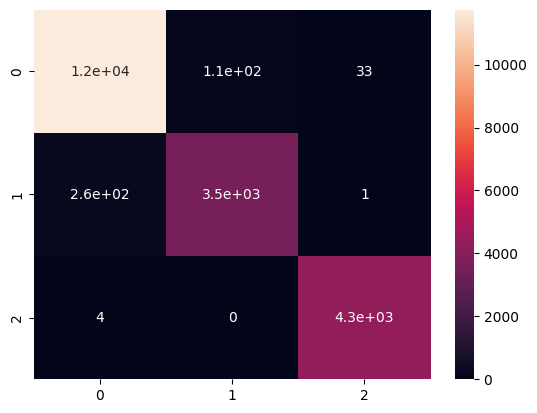

In [31]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

## Findings from the Confusion Matrix & Heatmap

**2. Key Observations**

* High accuracy across all classes, especially for STAR (Class 2), with only 4 misclassifications.
* QSO (Class 1) has the highest misclassification rate, with 258 samples classified as GALAXY.
* GALAXY (Class 0) is sometimes confused with QSO, but the misclassification count is relatively low.

**3. Insights for Model Improvement**

* **QSO misclassification is the biggest issue** (258 misclassified as GALAXY). This could be due to feature similarity between QSO and GALAXY.  Possible solutions include feature engineering or adjusting class weights.
* **STAR classification is almost perfect**, showing the model distinguishes it well.
* Minor misclassifications for GALAXY, but overall performance is strong.